In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# N used on corn, rate per fertilized acre (Table 10) extracted from
# https://www.ers.usda.gov/data-products/fertilizer-use-and-price.aspx
df = pd.read_csv("data/fertilizeruse.csv", sep=";", index_col="State")
df.columns.name = "Year"
df.head()

Year,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,,,,,,,,,,,
Alabama,69.0,79.0,84.0,90.0,75.0,96.0,96.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,166.0,167.0,...,NaN,127.0,NaN,NaN,NaN,NaN,NaN,116.0,NaN,153.0
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,100.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,NaN,71.0,80.0,76.0,93.0,103.0,97.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,72.0,77.0,95.0,114.0,114.0,119.0,118.0,117.0,115.0,117.0,...,NaN,177.0,NaN,NaN,NaN,NaN,NaN,187.0,NaN,NaN


Compute the mean and std by year accros all the states, of Nitrate use on corn

In [3]:
df_melted = df.melt().dropna()
df_result = df_melted.groupby("Year", as_index=False).agg({"value": ["mean", "std"]})
df_result.set_index("Year", inplace=True)
df_result.columns = df_result.columns.droplevel()
print(df_result.columns)
df_result.sample(10)

Index(['mean', 'std'], dtype='object')


,mean,std
Year,,
1980,126.470588,25.744217
1975,104.850000,21.246114
1988,130.090909,26.269581
1977,127.263158,30.005263
1969,102.560000,21.004127
1998,131.294118,30.355734
1990,125.909091,26.741184
1978,124.722222,24.494430
1991,123.181818,26.102943


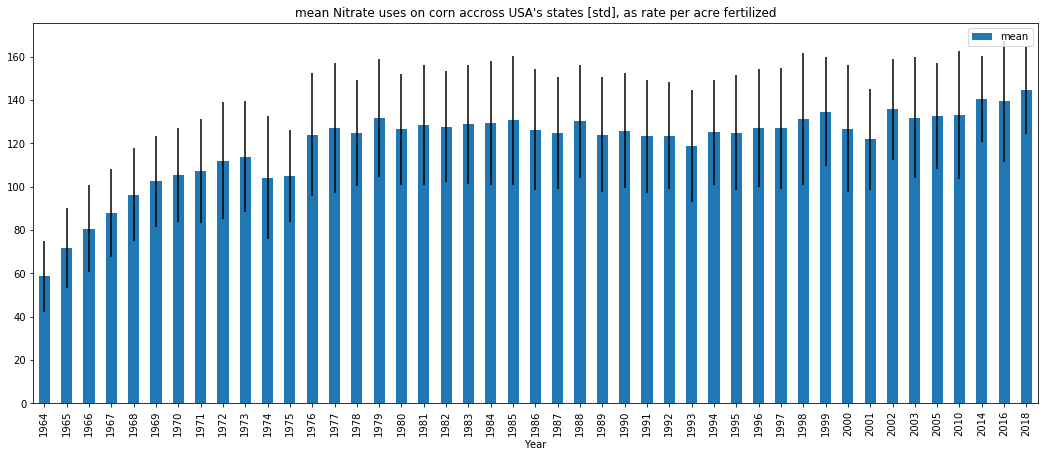

In [4]:
fig, ax = plt.subplots(figsize=(18,7))
df_result.plot.bar(
    y="mean",
    yerr="std",
    ax=ax,
    title="mean Nitrate uses on corn accross USA's states [std], as rate per acre fertilized"
)